In [1]:
import scipy.integrate as it
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Distance to cover
D = 5

In [3]:
# Hyperparameters
v_max = min(D/2, 1)
a_max = 0.75*v_max
j=1

In [4]:
# Final Velocities

vf1 = (a_max**2)/(2*j)
vf2 = v_max - (a_max**2)/(2*j)
vf3 = v_max
vf4 = v_max
vf5 = v_max - (a_max**2)/(2*j)
vf6 = (a_max**2)/(2*j)
vf7 = 0

In [5]:
# Time computation

tp1 = a_max/j
tp2 = (vf2 - vf1)/a_max
tp3 = a_max/j
tp4 = ((a_max*j*D) - (v_max*a_max**2) - (j*v_max**2))/(j*a_max*v_max)
tp5= a_max/j
tp6=(vf5 - vf6)/a_max
tp7=a_max/j


T = tp1 + tp2 + tp3 + tp4 + tp5 + tp6 + tp7

In [6]:
# Time steps
t_steps = np.arange(0, T, 0.001)

In [7]:
# velocity function

def v(t):
    # Phase 1
    if t <= tp1:
        return j*(t**2)/2
    # Phase 2
    elif t <= tp1 + tp2:
        t_curr = t - tp1
        return vf1 + (a_max * t_curr)
    # Phase 3
    elif t <= tp1 + tp2 + tp3:
        t_curr = t - tp1 - tp2
        return vf2 + a_max*t_curr - (j*(t_curr**2))/2
    # Phase 4
    elif t<= tp1 + tp2 + tp3 + tp4:
        t_curr = t - tp1 - tp2 - tp3
        return vf3
    # Phase 5
    elif t <= tp1 + tp2 + tp3 + tp4 + tp5:
        t_curr = t - tp1 - tp2 - tp3 - tp4
        return vf4 - (j*(t_curr**2))/2
    # Phase 6
    elif t <= tp1 + tp2 + tp3 + tp4 + tp5 + tp6:
        t_curr = t - tp1 - tp2 - tp3 - tp4 - tp5
        return vf5 - a_max*t_curr
    else:
        t_curr = t - tp1 - tp2 - tp3 - tp4 - tp5 - tp6
        return vf6 - a_max*t_curr + (j * (t_curr**2))/2

In [8]:
vel = []

for t in t_steps:
    vel.append(v(t))


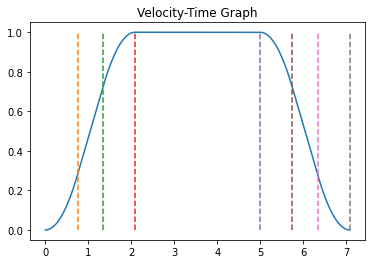

In [9]:
plt.plot(t_steps, vel)
plt.plot((tp1, tp1), (0, v_max), '--')
plt.plot((tp1 + tp2, tp1 + tp2), (0, v_max), '--')
plt.plot((tp1 + tp2 + tp3, tp1 + tp2 + tp3), (0, v_max), '--')
plt.plot((tp1 + tp2 + tp3 + tp4, tp1 + tp2 + tp3 + tp4), (0, v_max), '--')
plt.plot((tp1 + tp2 + tp3 + tp4 + tp5, tp1 + tp2 + tp3 + tp4 + tp5), (0, v_max), '--')
plt.plot((tp1 + tp2 + tp3 + tp4 + tp5 + tp6, tp1 + tp2 + tp3 + tp4+ tp5+ tp6), (0, v_max), '--')
plt.plot((tp1 + tp2 + tp3 + tp4 + tp5 + tp6 + tp7, tp1 + tp2 + tp3 + tp4 + tp5 + tp6 + tp7), (0, v_max), '--')
plt.title("Velocity-Time Graph")
plt.show()


In [10]:
p = it.cumulative_trapezoid(vel, t_steps)


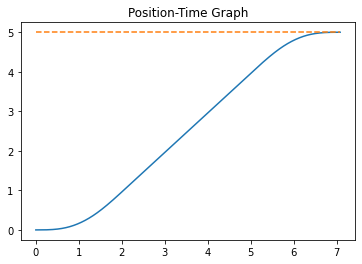

In [11]:
plt.plot(t_steps[1:], p)
plt.plot((0, T), (D, D), '--')
plt.title("Position-Time Graph")
plt.show()


In [12]:
print(f"Final Position: {p[-1]}")


Final Position: 4.99999999997222
